In [1]:
import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 10000
age = np.random.randint(25, 65, num_samples)
salary = np.random.uniform(30000, 200000, num_samples)
contribution_rate = np.random.uniform(0.05, 0.2, num_samples)
years_to_retirement = np.random.randint(0, 40, num_samples)
fund_balance = salary * years_to_retirement * contribution_rate * np.random.uniform(0.5, 1.5, num_samples)
risk_tolerance = np.random.choice(['Low', 'Medium', 'High'], num_samples)
expected_return = np.random.uniform(0.02, 0.1, num_samples)
investment_strategy = np.random.choice(['Conservative', 'Balanced', 'Aggressive'], num_samples)

# Create the DataFrame
data = pd.DataFrame({
    'Age': age,
    'Salary': salary,
    'Contribution Rate': contribution_rate,
    'Years to Retirement': years_to_retirement,
    'Fund Balance': fund_balance,
    'Risk Tolerance': risk_tolerance,
    'Expected Return': expected_return,
    'Investment Strategy': investment_strategy
})

# Save to CSV
data.to_csv('synthetic_pension_fund_data.csv', index=False)


                Age         Salary  Contribution Rate  Years to Retirement  \
count  10000.000000   10000.000000       10000.000000         10000.000000   
mean      44.561800  114677.116603           0.125489            19.413300   
std       11.454986   48798.498821           0.043406            11.591243   
min       25.000000   30020.169635           0.050001             0.000000   
25%       35.000000   72929.724378           0.088057             9.000000   
50%       45.000000  114541.727634           0.125599            20.000000   
75%       54.000000  156206.435135           0.163168            29.000000   
max       64.000000  199981.753340           0.199984            39.000000   

       Fund Balance  Expected Return  
count  1.000000e+04     10000.000000  
mean   2.803231e+05         0.060426  
std    2.765515e+05         0.023103  
min    0.000000e+00         0.020004  
25%    8.490443e+04         0.040470  
50%    1.939078e+05         0.060474  
75%    3.875647e+05     

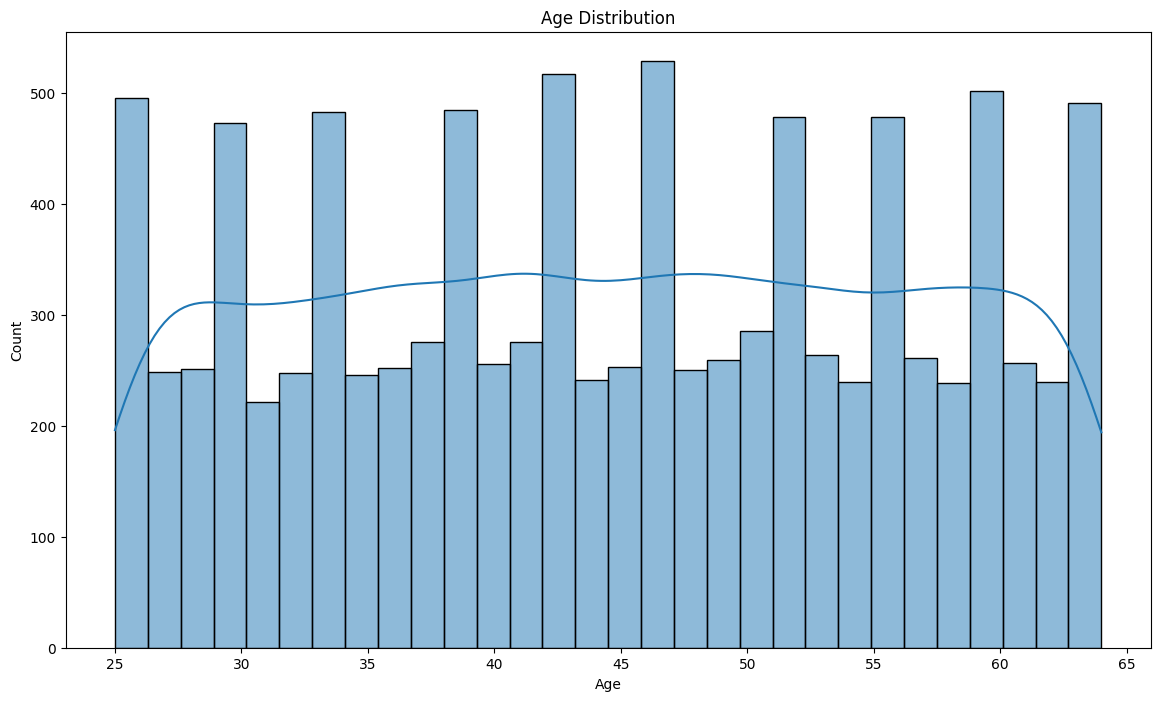

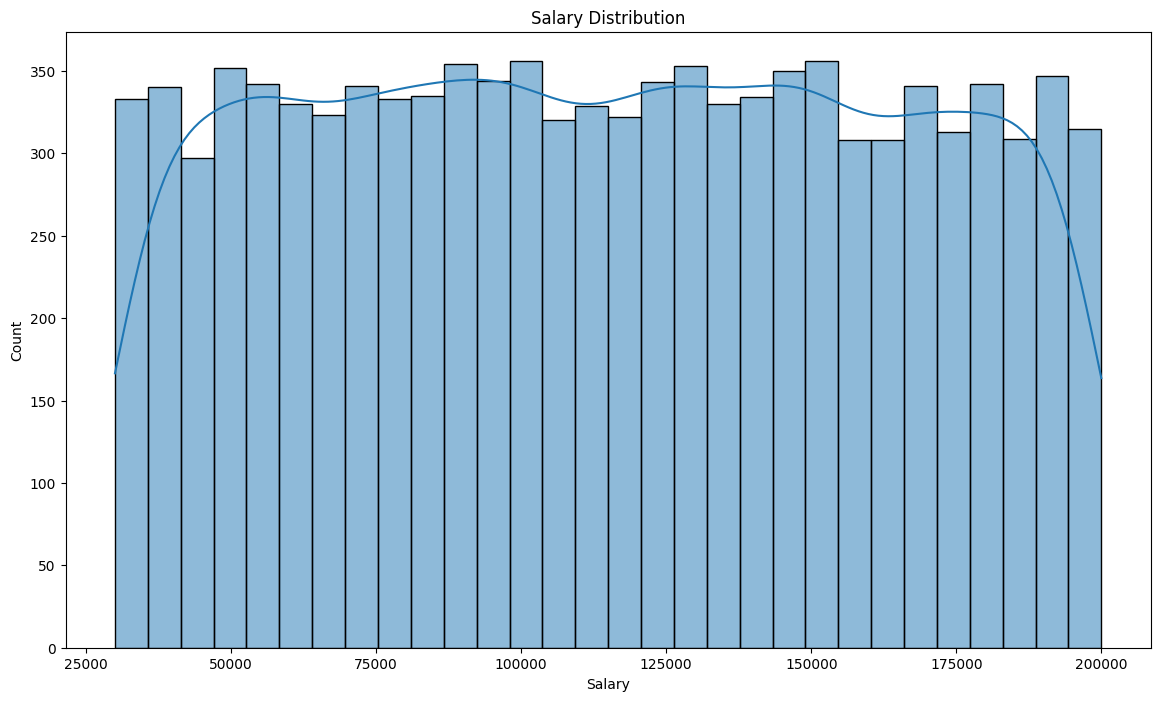

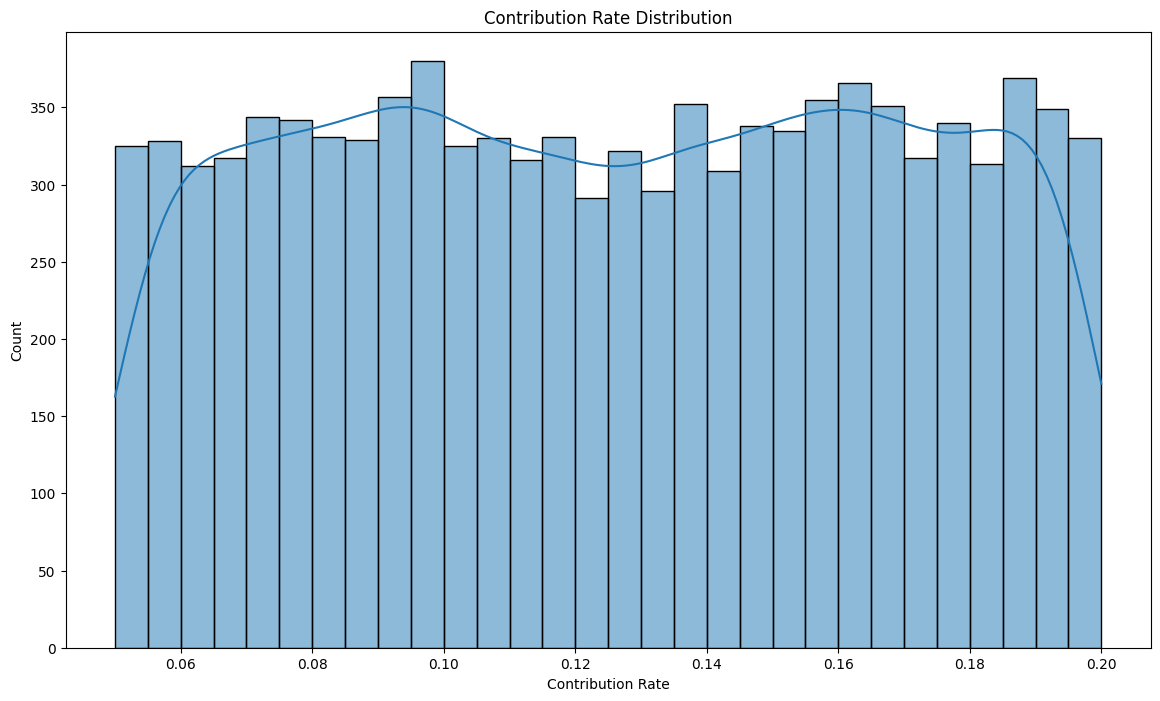

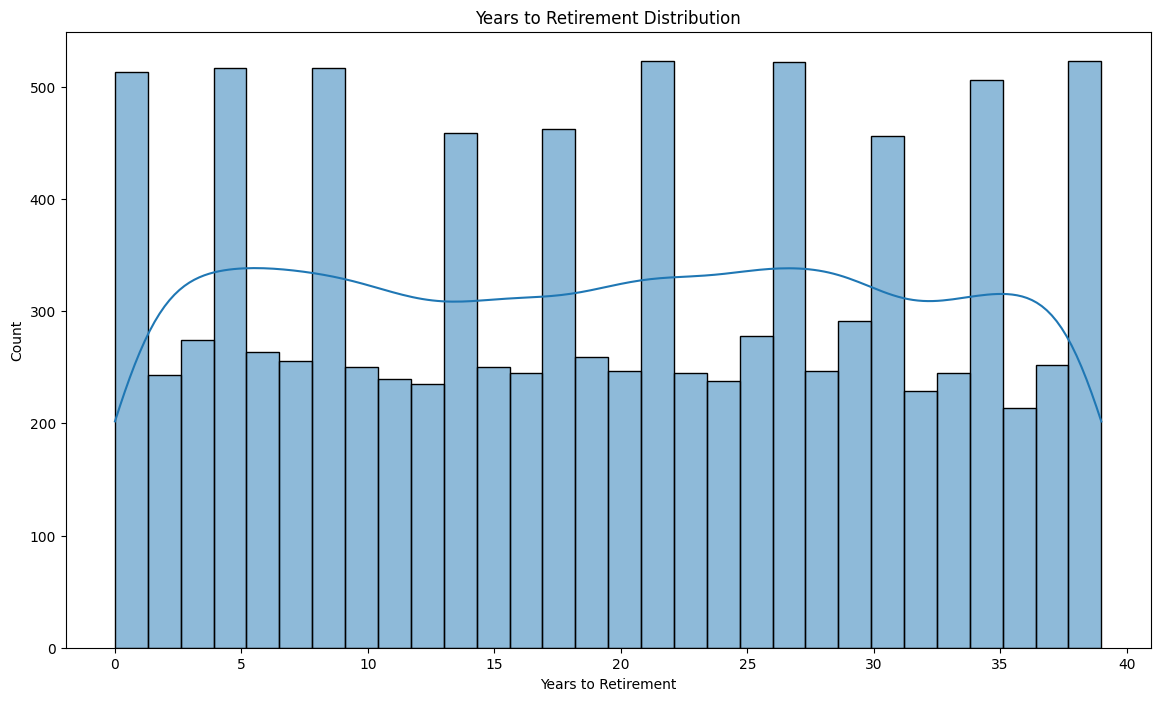

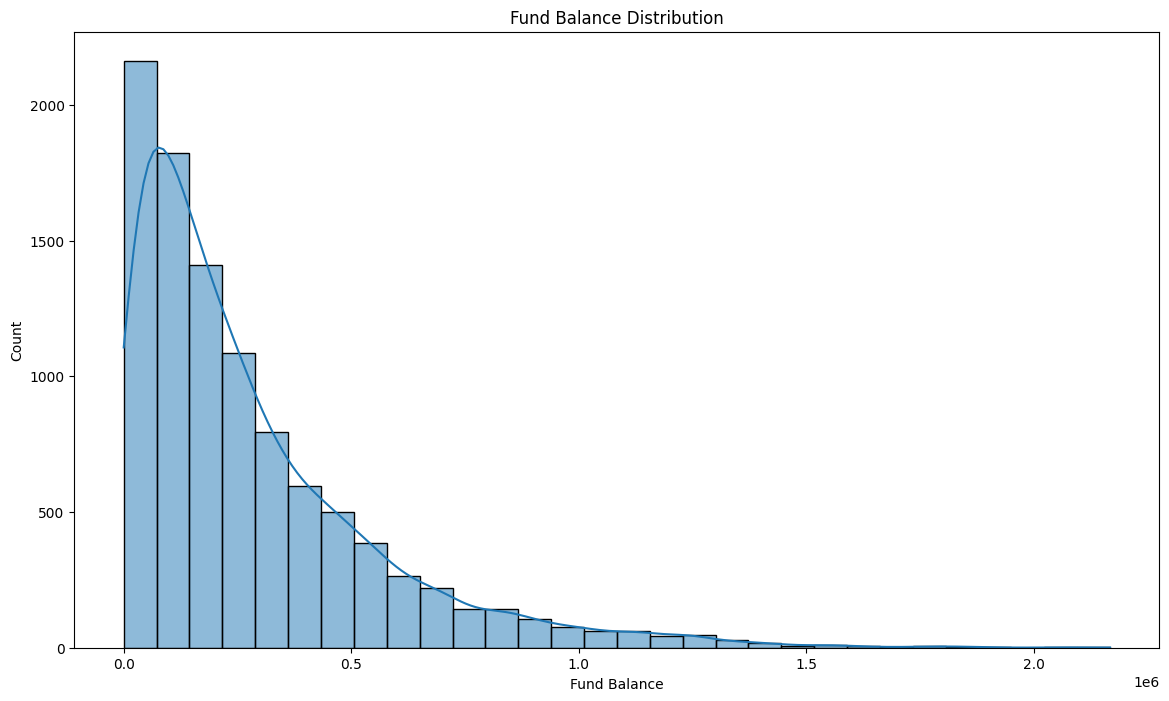

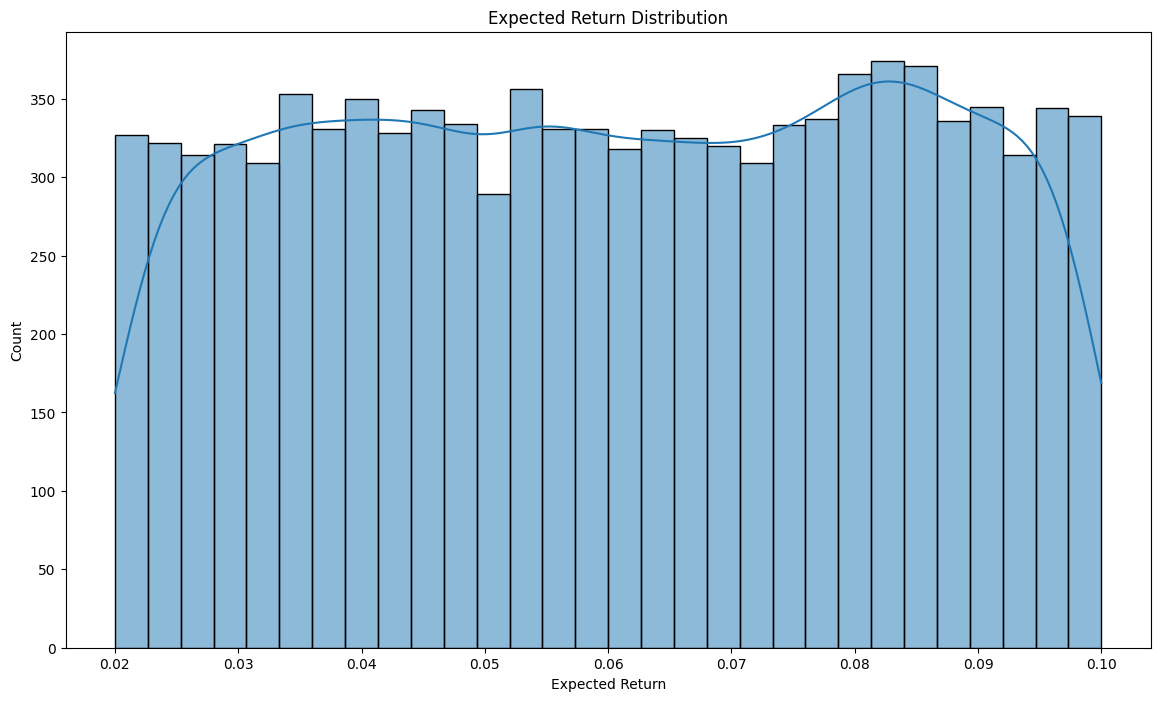

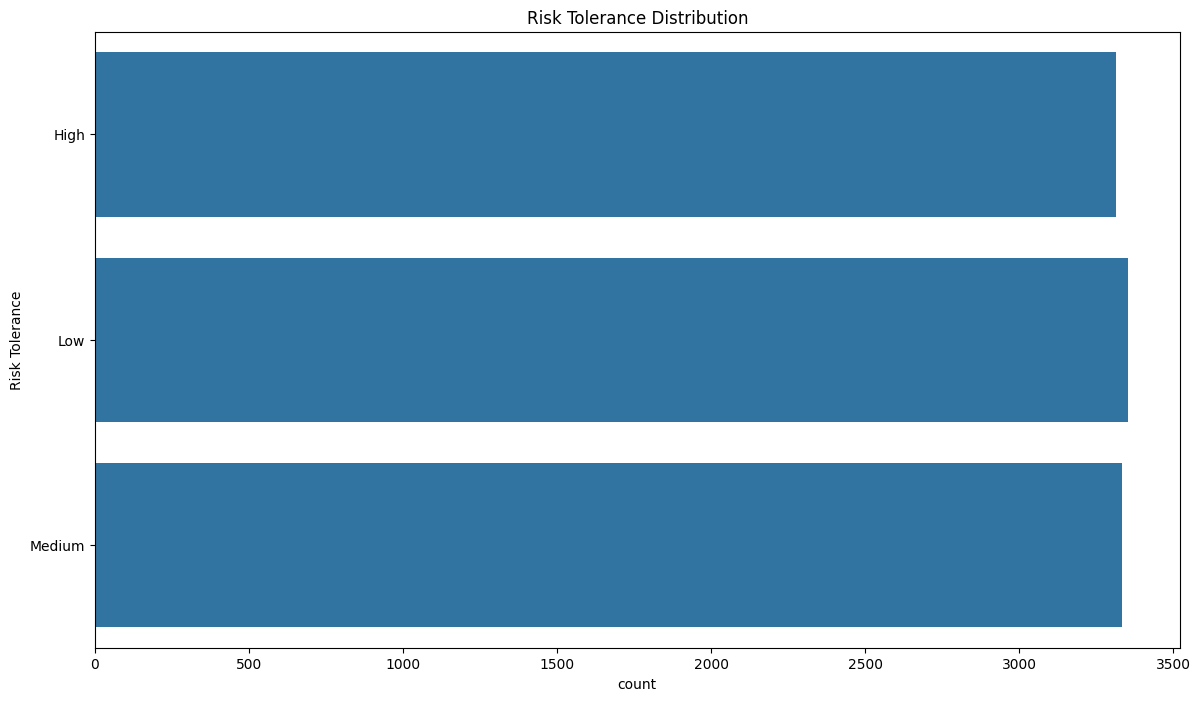

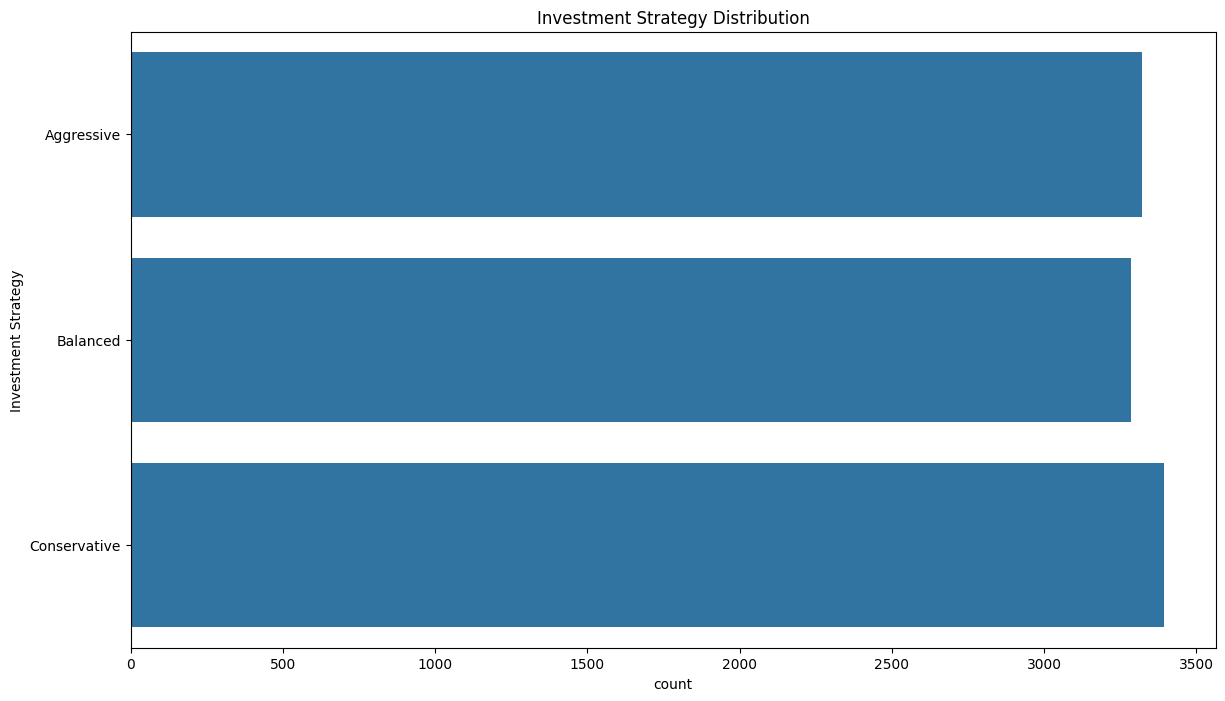

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('synthetic_pension_fund_data.csv')

# Display basic statistics
print(data.describe())

# Display the first few rows of the dataset
print(data.head())

# Plot the distribution of numerical features
plt.figure(figsize=(14, 8))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Salary'], kde=True, bins=30)
plt.title('Salary Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Contribution Rate'], kde=True, bins=30)
plt.title('Contribution Rate Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Years to Retirement'], kde=True, bins=30)
plt.title('Years to Retirement Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Fund Balance'], kde=True, bins=30)
plt.title('Fund Balance Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Expected Return'], kde=True, bins=30)
plt.title('Expected Return Distribution')
plt.show()

# Plot the count of categorical features
plt.figure(figsize=(14, 8))
sns.countplot(data['Risk Tolerance'])
plt.title('Risk Tolerance Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.countplot(data['Investment Strategy'])
plt.title('Investment Strategy Distribution')
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
data['Risk Tolerance'] = LabelEncoder().fit_transform(data['Risk Tolerance'])
data['Investment Strategy'] = LabelEncoder().fit_transform(data['Investment Strategy'])

# Define features and target
features = ['Age', 'Salary', 'Contribution Rate', 'Years to Retirement', 'Fund Balance', 'Risk Tolerance', 'Expected Return', 'Investment Strategy']
target = 'Expected Return'

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1))

mlp_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
mlp_loss, mlp_mae = mlp_model.evaluate(X_test, y_test)
print(f'MLP Model MAE: {mlp_mae:.4f}')


Epoch 1/10
250/250 [==============================] - 2s 5ms/step - loss: 0.0080 - mae: 0.0560 - val_loss: 0.0012 - val_mae: 0.0274
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 8.7462e-04 - mae: 0.0232 - val_loss: 6.7926e-04 - val_mae: 0.0205
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 5.2008e-04 - mae: 0.0180 - val_loss: 4.2488e-04 - val_mae: 0.0162
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 3.5663e-04 - mae: 0.0149 - val_loss: 3.3506e-04 - val_mae: 0.0143
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 2.5575e-04 - mae: 0.0127 - val_loss: 2.3776e-04 - val_mae: 0.0121
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 1.9622e-04 - mae: 0.0111 - val_loss: 1.9065e-04 - val_mae: 0.0109
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 1.5765e-04 - mae: 0.0099 - val_loss: 1.5631e-04 - val_mae: 0.0098
Epoch 8/10
250/250 [========

In [5]:
from tensorflow.keras.layers import Conv1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))

cnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
cnn_loss, cnn_mae = cnn_model.evaluate(X_test_cnn, y_test)
print(f'CNN Model MAE: {cnn_mae:.4f}')


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.0021 - mae: 0.0275 - val_loss: 3.2206e-04 - val_mae: 0.0143
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 2.4581e-04 - mae: 0.0123 - val_loss: 1.7055e-04 - val_mae: 0.0102
Epoch 3/10
250/250 [==============================] - 1s 4ms/step - loss: 1.5451e-04 - mae: 0.0098 - val_loss: 1.1593e-04 - val_mae: 0.0086
Epoch 4/10
250/250 [==============================] - 1s 4ms/step - loss: 1.1026e-04 - mae: 0.0083 - val_loss: 9.9763e-05 - val_mae: 0.0078
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 9.3307e-05 - mae: 0.0076 - val_loss: 7.1802e-05 - val_mae: 0.0066
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 7.1661e-05 - mae: 0.0067 - val_loss: 7.8756e-05 - val_mae: 0.0070
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 5.4842e-05 - mae: 0.0059 - val_loss: 5.7646e-05 - val_mae: 0.0059
Epoch 8/10
250/250 [====

In [6]:
from tensorflow.keras.layers import LSTM

# Reshape data for RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(LSTM(32, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(1))

rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the model
rnn_loss, rnn_mae = rnn_model.evaluate(X_test_rnn, y_test)
print(f'RNN Model MAE: {rnn_mae:.4f}')


Epoch 1/10
250/250 [==============================] - 3s 7ms/step - loss: 3.8883e-04 - mae: 0.0149 - val_loss: 1.1359e-04 - val_mae: 0.0089
Epoch 2/10
250/250 [==============================] - 1s 6ms/step - loss: 6.3676e-05 - mae: 0.0065 - val_loss: 2.1621e-05 - val_mae: 0.0038
Epoch 3/10
250/250 [==============================] - 1s 6ms/step - loss: 1.3016e-05 - mae: 0.0028 - val_loss: 7.8557e-06 - val_mae: 0.0022
Epoch 4/10
250/250 [==============================] - 1s 6ms/step - loss: 5.3104e-06 - mae: 0.0018 - val_loss: 3.3863e-06 - val_mae: 0.0014
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 3.0407e-06 - mae: 0.0014 - val_loss: 3.3889e-06 - val_mae: 0.0014
Epoch 6/10
250/250 [==============================] - 2s 7ms/step - loss: 2.2634e-06 - mae: 0.0012 - val_loss: 1.8973e-06 - val_mae: 0.0011
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 1.5356e-06 - mae: 9.7211e-04 - val_loss: 1.1331e-06 - val_mae: 8.2064e-04
Epoch 8/10
2